In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import os, json, math, librosa

import IPython.display as ipd
import librosa.display

import tensorflow as tf
import tensorflow.keras as keras

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D

import sklearn.model_selection as sk

from sklearn.model_selection import train_test_split

import imageio.v3 as iio

In [2]:
data_blue = []
data_classic = []
data_country = []
data_disco = []


# BLUE
for dirname, _, filenames in os.walk('/Users/kailaiwang/Documents/CS4701/Data/images_original/blues'):
    pass
for filename in filenames:
    im = iio.imread('/Users/kailaiwang/Documents/CS4701/Data/images_original/blues/'+filename)
    data_blue.append(im)


# CLASSICAL
for dirname, _, filenames in os.walk('/Users/kailaiwang/Documents/CS4701/Data/images_original/classical'):
    pass
for filename in filenames:
    im = iio.imread('/Users/kailaiwang/Documents/CS4701/Data/images_original/classical/'+filename)
    data_classic.append(im)

# Country
for dirname, _, filenames in os.walk('/Users/kailaiwang/Documents/CS4701/Data/images_original/country'):
    pass
for filename in filenames:
    im = iio.imread('/Users/kailaiwang/Documents/CS4701/Data/images_original/country/'+filename)
    data_country.append(im)

# Disco
for dirname, _, filenames in os.walk('/Users/kailaiwang/Documents/CS4701/Data/images_original/disco'):
    pass
for filename in filenames:
    im = iio.imread('/Users/kailaiwang/Documents/CS4701/Data/images_original/disco/'+filename)
    data_disco.append(im)


data_blue = np.array([data_blue]).reshape([100,288,432,4])
data_classic = np.array([data_classic]).reshape([100,288,432,4])
data_country = np.array([data_country]).reshape([100,288,432,4])
data_disco = np.array([data_disco]).reshape([100,288,432,4])



In [3]:
data_X = np.concatenate((data_blue, data_classic,data_country,data_disco))
data_X.shape

(400, 288, 432, 4)

In [4]:
import numpy as np

# Create arrays with 100 zeros, ones, twos, and threes
zeros_array = np.zeros(100)
ones_array = np.ones(100)
twos_array = np.full(100, 2)
threes_array = np.full(100, 3)

# Concatenate the arrays
data_Y= np.concatenate((zeros_array, ones_array, twos_array, threes_array))


print(data_Y)
print(data_Y.shape)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.

In [5]:
import tensorflow.keras as keras

# Assuming you have data_X with shape (200, 288, 432, 4) and data_Y with shape (200)

# Split data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(data_X, data_Y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Define number of classes
num_classes = len(np.unique(data_Y))
print("Number of classes: ", num_classes)

# Define model
model = keras.Sequential()

# 1st conv layer
model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(288, 432, 4)))
model.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
model.add(keras.layers.BatchNormalization())

# 2nd conv layer
model.add(keras.layers.Conv2D(32, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
model.add(keras.layers.BatchNormalization())

# 3rd conv layer
model.add(keras.layers.Conv2D(32, (2, 2), activation='relu'))
model.add(keras.layers.MaxPooling2D((2, 2), strides=(2, 2), padding='same'))
model.add(keras.layers.BatchNormalization())

# flatten output and feed it into dense layer
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.3))

# output layer
model.add(keras.layers.Dense(num_classes, activation='softmax'))  # Use softmax activation





# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # Use sparse categorical crossentropy
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

# Evaluate on validation set
val_loss, val_acc = model.evaluate(X_val, y_val)

# Evaluate on test set
test_loss, test_acc = model.evaluate(X_test, y_test)

print(f"Validation Loss: {val_loss}, Validation Accuracy: {val_acc}")
print(f"Test Loss: {test_loss}, Test Accuracy: {test_acc}")


Number of classes:  4
Epoch 1/10


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 593ms/step - accuracy: 0.3525 - loss: 9.0762 - val_accuracy: 0.1750 - val_loss: 121.0658
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 580ms/step - accuracy: 0.4096 - loss: 2.7252 - val_accuracy: 0.1750 - val_loss: 50.9679
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 613ms/step - accuracy: 0.4646 - loss: 1.1906 - val_accuracy: 0.1750 - val_loss: 21.8289
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 730ms/step - accuracy: 0.4942 - loss: 0.9712 - val_accuracy: 0.1625 - val_loss: 9.5007
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 758ms/step - accuracy: 0.5462 - loss: 0.8928 - val_accuracy: 0.1750 - val_loss: 7.0273
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 767ms/step - accuracy: 0.5752 - loss: 0.8483 - val_accuracy: 0.1875 - val_loss: 5.2750
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 793ms/step - accuracy: 0.6407 - loss: 0.7968 - val_accuracy: 0.1875 - val_loss: 5.5175
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 7s 901ms/step - accuracy: 0.6400 - loss: 0.6449 - val_accuracy: 0.1875 - val_loss: 5.4390

In [6]:
# Things to try next

# make our own spectrograms from .wav files
# improve the CNN model
# hyperparameter tuning
# train in batches



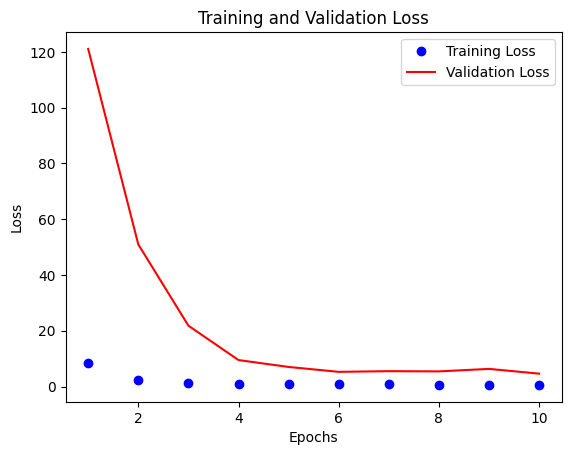

In [7]:
import matplotlib.pyplot as plt

# Extract loss values from the history object
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot training and validation loss
epochs = range(1, len(train_loss) + 1)
plt.plot(epochs, train_loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


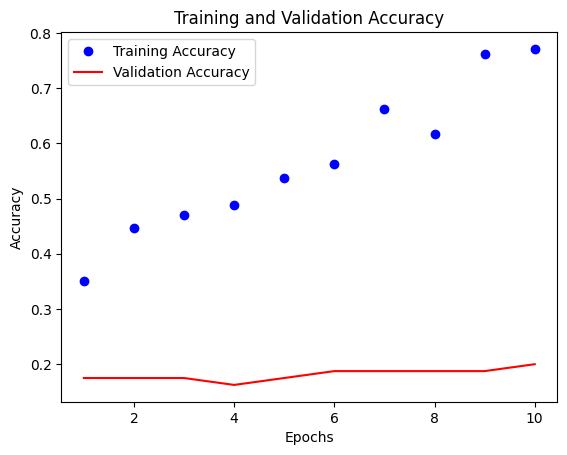

In [8]:
# Extract accuracy values from the history object
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Plot training and validation accuracy
plt.plot(epochs, train_acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [9]:
# Make predictions on the test set
predictions = model.predict(X_test)


# Print the predictions
print("Predictions:")
print(predictions)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 164ms/step
Predictions:
[[4.00750479e-03 1.06899261e-05 3.16045612e-01 6.79936171e-01]
 [7.17282819e-04 1.52165569e-07 1.20210908e-02 9.87261474e-01]
 [2.30759429e-03 1.05905574e-05 3.89805049e-01 6.07876778e-01]
 [1.33073470e-02 2.06483746e-04 2.76300788e-01 7.10185409e-01]
 [2.03514341e-02 9.19942278e-04 3.47732484e-01 6.30996108e-01]
 [7.38058565e-03 4.23260208e-05 2.19125599e-01 7.73451507e-01]
 [9.98209417e-03 1.58301496e-04 2.71635592e-01 7.18223989e-01]
 [6.60911202e-04 1.72268440e-08 5.89998672e-03 9.93439078e-01]
 [3.36875673e-03 1.46144057e-05 2.14102983e-01 7.82513618e-01]
 [2.47096480e-03 5.31763635e-06 1.72616005e-01 8.24907601e-01]
 [1.10204541e-03 1.22607517e-07 4.68465127e-03 9.94213283e-01]
 [1.67175964e-03 8.85830673e-07 6.50463849e-02 9.33281004e-01]
 [1.30637577e-02 4.42306540e-04 7.18701333e-02 9.14623797e-01]
 [5.51444595e-04 4.35765131e-08 1.84796974e-02 9.80968893e-01]
 [5.95692080e-03 1.10979281e-05 8.74463841e-02 9.06585574e-01]
 [3

In [10]:
# Get the predicted class labels
predicted_labels = np.argmax(predictions, axis=1)

# Print the predicted class labels
print("Predicted Labels:")
print(predicted_labels)


# Get the number of correct predictions
correct_predictions = np.sum(predicted_labels == y_test)

# Calculate the total number of samples in the test set
total_samples = len(y_test)

# Calculate the test accuracy
test_accuracy = correct_predictions / total_samples


print("correct labels", y_test)

# Print the test accuracy
print(f"Test Accuracy: {test_accuracy}")




Predicted Labels:
[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3]
correct labels [0. 3. 1. 0. 1. 1. 1. 3. 2. 2. 3. 2. 0. 3. 0. 3. 1. 1. 2. 2. 2. 2. 0. 1.
 1. 3. 3. 2. 1. 1. 2. 1. 1. 0. 0. 3. 3. 0. 0. 2. 1. 2. 2. 3. 0. 1. 0. 3.
 1. 2. 2. 3. 0. 0. 3. 2. 2. 3. 3. 0. 0. 1. 2. 3. 2. 3. 0. 3. 3. 2. 2. 3.
 1. 0. 2. 2. 3. 2. 3. 2.]
Test Accuracy: 0.275
